In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
adult_dataset = pd.read_csv(r'Downloads/adult.csv',names= ['age','workclass','fnlwgt','education',
                                                                       'education-num','marital-status','occupation',
                                                                       'relationship','race','sex','capital-gain',
                                                                       'capital-loss','hours-per-week','native-country',
                                                                       'salary'],na_values=' ?')

adult_dataset.shape

(32561, 15)

In [23]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [25]:
adult_dataset.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [27]:
adult_dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [33]:
df_num_var = adult_dataset.select_dtypes(include=['int64','float64'])

df_num_var.shape

(32561, 6)

In [35]:
df_num_var.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [37]:
df_cat_var = adult_dataset.select_dtypes(include=['O'])

df_cat_var.shape

(32561, 9)

In [41]:
cat_miss_per = df_cat_var.isnull().sum()/df_cat_var.shape[0]*100

cat_miss_per

workclass         5.638647
education         0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
native-country    1.790486
salary            0.000000
dtype: float64

In [46]:
cat_miss_var = cat_miss_per[cat_miss_per > 0].keys()

cat_miss_var

Index(['workclass', 'occupation', 'native-country'], dtype='object')

In [49]:
df_cat_var['workclass'].mode()

0     Private
dtype: object

In [52]:
df_cat_var['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [54]:
df_cat_var['workclass'].fillna(df_cat_var['workclass'].mode()[0])

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
5                  Private
6                  Private
7         Self-emp-not-inc
8                  Private
9                  Private
10                 Private
11               State-gov
12                 Private
13                 Private
14                 Private
15                 Private
16        Self-emp-not-inc
17                 Private
18                 Private
19        Self-emp-not-inc
20                 Private
21                 Private
22             Federal-gov
23                 Private
24                 Private
25               Local-gov
26                 Private
27                 Private
28                 Private
29                 Private
30               Local-gov
31                 Private
32                 Private
33             Federal-gov
34               State-gov
35                 Private
36                 Private
3

In [58]:
for var in cat_miss_var:
    df_cat_var[var].fillna(df_cat_var[var].mode()[0],inplace=True)
    print(var,'=',df_cat_var[var].mode()[0])
    

workclass =  Private
occupation =  Prof-specialty
native-country =  United-States


In [60]:
df_cat_var.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
salary            0
dtype: int64

## Distplot

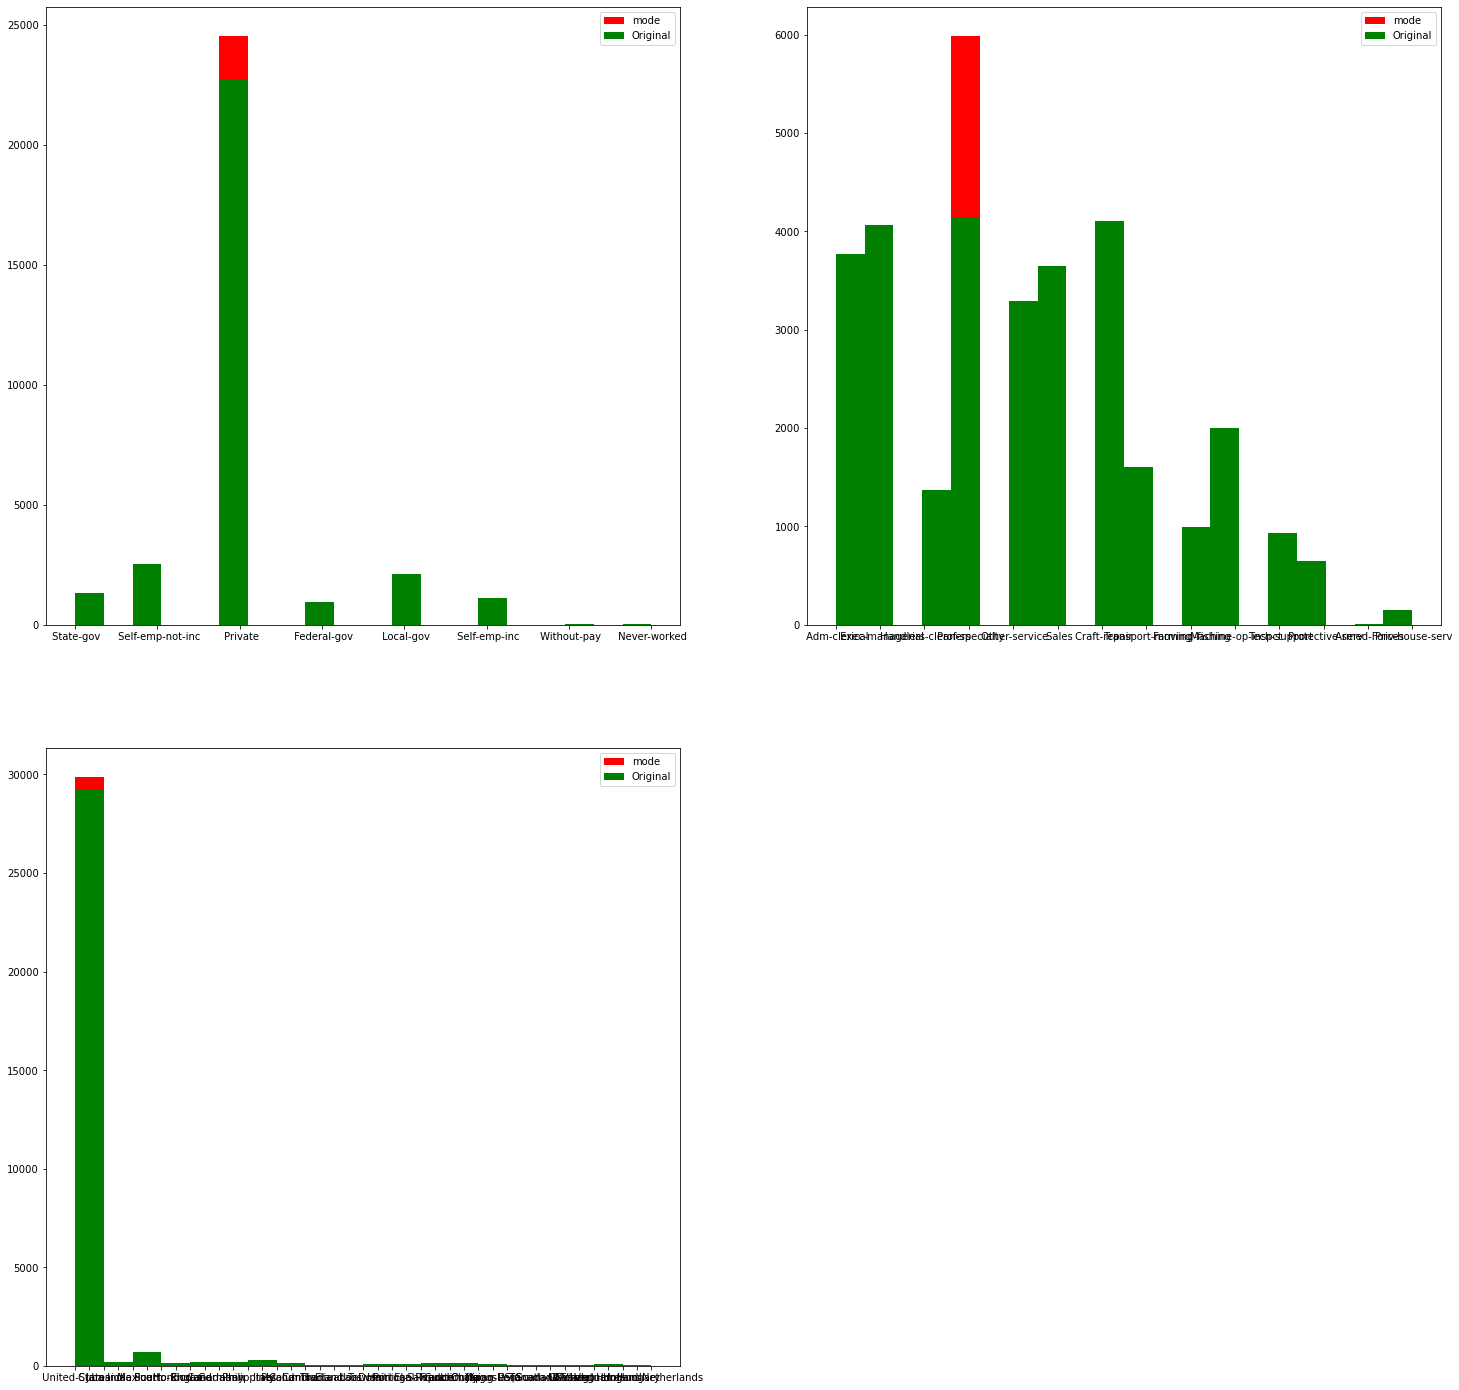

In [65]:
plt.figure(figsize=(25,25))

for i,var in enumerate(cat_miss_var):
    plt.subplot(2,2,i+1)
    plt.hist(df_cat_var[var],bins=20,color='red',label='mode')
    plt.hist(adult_dataset[var].dropna(),bins=20,color='green',label='Original')
    plt.legend()

In [67]:
adult_dataset.update(df_cat_var)


In [68]:
adult_dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64